In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Part 1: Minimum-Tracking-Error Frontier

Let the market return be the target return. Estimate the expected deviation from market return, for the ten industry portfolios:

$$ R_i=E(\tilde{R}_i−\tilde{R}_m) $$

In [2]:
market_portfolio = pd.read_excel("Market_Portfolio.xlsx", index_col = 0)
market_portfolio

D:\Downloads\Anaconda\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Market
Date,
200401,2.22
200402,1.46
200403,-1.23
200404,-1.75
200405,1.23
...,...
201308,-2.69
201309,3.76
201310,4.17


In [3]:
industry_portfolio = pd.read_excel("Industry_Portfolios.xlsx", index_col = 0)
industry_portfolio

D:\Downloads\Anaconda\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


In [2]:
industry = industry_portfolio.columns.tolist()
excess_return_name_list = []
Rm = market_portfolio["Market"]

for i in industry:
    tag = i+'_'+"R_e"
    market_portfolio[tag] = industry_portfolio[i] - market_portfolio["Market"]
    excess_return_name_list.append(tag)
    
R = market_portfolio[excess_return_name_list].mean()
Expected_Devation = pd.DataFrame(market_portfolio[excess_return_name_list].mean(),
                                 columns = ["return_devation"])
Expected_Devation

/Users/xiezijun/Documents/anaconda/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,return_devation
NoDur_R_e,0.154750
Durbl_R_e,-0.014750
Manuf_R_e,0.264750
Enrgy_R_e,0.483083
HiTec_R_e,0.018167
Telcm_R_e,0.133333
Shops_R_e,0.168250
Hlth_R_e,0.035750
Utils_R_e,0.159083
Other_R_e,-0.259000


Also estimate the covariance matrix of return deviations, for the ten industry portfolios:

$$ V_{ij}=Cov[(\tilde{R}_i−\tilde{R}_m),(\tilde{R}_j−\tilde{R}_m)] $$

In [3]:
V = market_portfolio[excess_return_name_list].cov()
V

,NoDur_R_e,Durbl_R_e,Manuf_R_e,Enrgy_R_e,HiTec_R_e,Telcm_R_e,Shops_R_e,Hlth_R_e,Utils_R_e,Other_R_e
NoDur_R_e,5.439696,-6.073035,-1.396192,-1.200533,-1.883151,1.538885,1.140741,3.815137,4.272002,-1.768738
Durbl_R_e,-6.073035,26.628901,4.908024,-3.481055,1.891577,-1.707625,-0.354335,-8.082946,-9.617490,4.385865
Manuf_R_e,-1.396192,4.908024,2.950499,1.666133,0.065267,-0.626416,-1.154597,-2.288900,-1.901412,0.358904
Enrgy_R_e,-1.200533,-3.481055,1.666133,19.274911,-1.516972,-1.040525,-3.710439,-2.485796,4.454368,-3.864826
HiTec_R_e,-1.883151,1.891577,0.065267,-1.516972,5.098746,-0.773294,-0.245350,-1.936284,-2.342839,-1.404050
Telcm_R_e,1.538885,-1.707625,-0.626416,-1.040525,-0.773294,4.682567,0.463797,0.693157,2.721477,-1.271778
Shops_R_e,1.140741,-0.354335,-1.154597,-3.710439,-0.245350,0.463797,4.452628,0.764510,-0.176666,-0.256987
Hlth_R_e,3.815137,-8.082946,-2.288900,-2.485796,-1.936284,0.693157,0.764510,7.820446,3.496136,-1.726842
Utils_R_e,4.272002,-9.617490,-1.901412,4.454368,-2.342839,2.721477,-0.176666,3.496136,12.267476,-4.055112
Other_R_e,-1.768738,4.385865,0.358904,-3.864826,-1.404050,-1.271778,-0.256987,-1.726842,-4.055112,4.503204


### Q1.1 Plot the minimum-tracking-error frontier generated by the ten industry portfolios, with expected return deviation on the vertical axis and tracking error on the horizontal axis. This plot should cover the range from 0% to 0.1% on the vertical axis, in increments of 0.005%. 

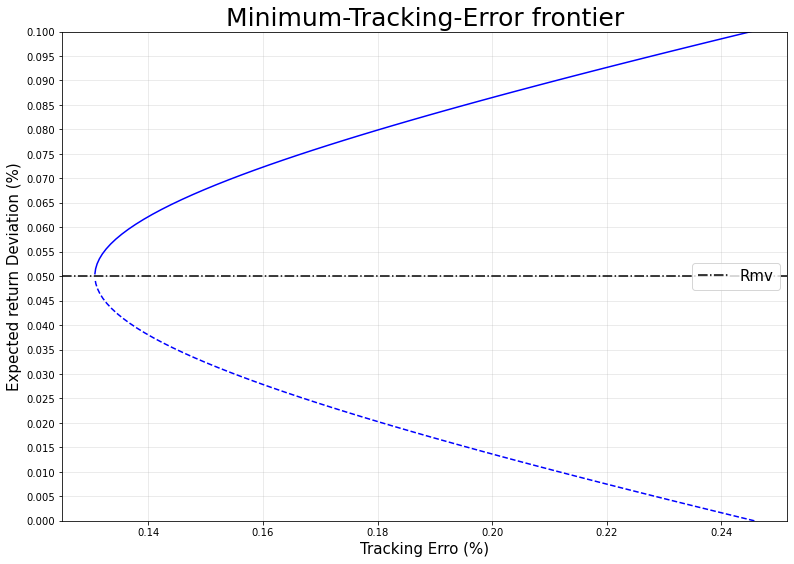

In [4]:
e = np.ones(10)
V_INV = np.linalg.inv(V)
Alpha = R.T.dot(V_INV).dot(e)
Zeta = R.T.dot(V_INV).dot(R)
Delta = e.T.dot(V_INV).dot(e)
Rmv = Alpha/Delta

def STD_no_riskless(Rp):
    return ((1/Delta) + (Delta/(Zeta*Delta - Alpha**2))*(Rp - Rmv)**2)**0.5

def frontier_single(Rp):

    fig, ax = plt.subplots(figsize = (13,9))
    
    ax.plot(STD_no_riskless(Rp[Rp>=Rmv]), Rp[Rp>=Rmv], color = "blue")
    ax.plot(STD_no_riskless(Rp[Rp<=Rmv]), Rp[Rp<=Rmv], color = "blue", linestyle = '--')
    
    ax.axhline(y = Rmv, color ='black', linestyle = '-.')
    plt.legend(loc = "center right", fontsize = 15)
    
    ax.set_title("Minimum-Tracking-Error frontier", size = 25)
    ax.set_xlabel("Tracking Erro (%)", fontsize = 15)
    ax.set_ylabel("Expected return Deviation (%)", fontsize = 15)    
    ax.set_yticks(np.linspace(0, 0.1, 21))
    ax.set_ylim(0,0.1)
    ax.grid(alpha = 0.3)

    plt.show()
    return

Rp = np.linspace(0, 0.1, 100)
frontier_single(Rp)

### Q1.2 Also plot the line starting from the origin that is tangent to the upper half of the minimum-tracking-error frontier, and calculate the information ratio and portfolio weights for the "tangency" portfolio.

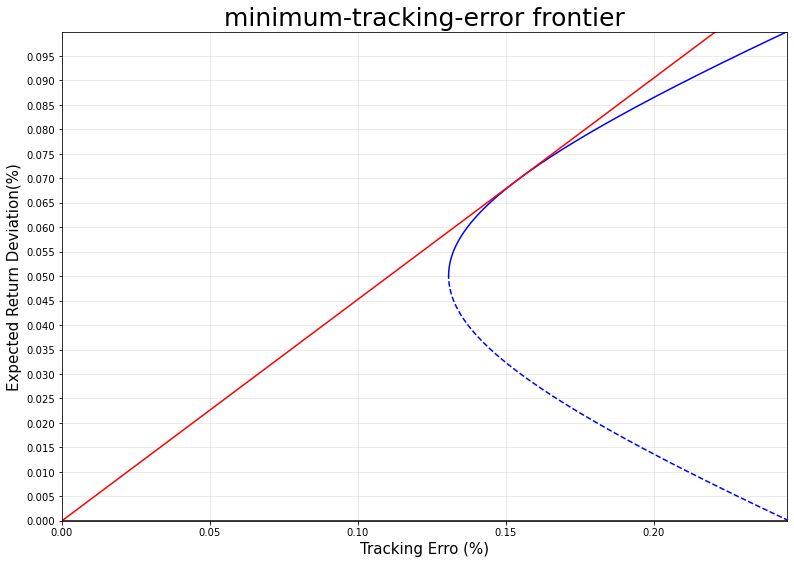

In [5]:
Rf = 0.0

def STD_with_riskless(Rp, Rf):
    return np.piecewise(Rp,
                        [Rp >= Rf, Rp < Rf],
                        [lambda Rp: ((Rp -Rf)**2 / (Zeta - 2*Alpha*Rf + Delta*Rf**2))**0.5,
                          lambda Rp: ((Rf -Rp)**2 / (Zeta - 2*Alpha*Rf + Delta*Rf**2))**0.5])

def Rtg(Rf):
    return (Alpha*Rf - Zeta) / (Delta*Rf - Alpha)

def frontier_with_line(Rp, Rf):    
    fig, ax = plt.subplots(figsize = (13,9))
    
    ax.plot(STD_no_riskless(Rp[Rp>=Rmv]), Rp[Rp>=Rmv],
            color = "blue")
    ax.plot(STD_no_riskless(Rp[Rp<=Rmv]), Rp[Rp<=Rmv],
            color = "blue", linestyle = '--')
    
    ax.plot(STD_with_riskless(Rp[Rp>=Rf], Rf), Rp[Rp>=Rf], color = 'red')
    ax.plot(STD_with_riskless(Rp[Rp<=Rf], Rf), Rp[Rp<=Rf], color = 'red', linestyle = '--')
    
    ax.grid(True, alpha = 0.3)
    ax.axhline(y = 0, color ='black')
    ax.set_title("minimum-tracking-error frontier", size = 25)
    ax.set_xlabel("Tracking Erro (%)", fontsize = 15)
    ax.set_ylabel("Expected Return Deviation(%)", fontsize = 15)    
    ax.set_yticks(np.arange(Rp[0], Rp[-1], 0.005))
    ax.set_xlim(0, STD_no_riskless(Rp[-1]))
    ax.set_ylim(Rp[0], Rp[-1])

    plt.show()
    return

Rp = np.linspace(0, 0.1, 1000)
frontier_with_line(Rp, Rf)

In [6]:
def information_ratio(Rf):
    return (Zeta - 2*Alpha*Rf + Delta*Rf**2)**0.5

def weights(Rf):
    a = (Zeta*V_INV.dot(e) - Alpha*V_INV.dot(R)) / (Zeta*Delta - Alpha**2)
    b = (Delta*V_INV.dot(R) - Alpha*V_INV.dot(e)) / (Zeta*Delta - Alpha**2)
    return a + b * Rtg(Rf)

print("Information Ratio = ", information_ratio(Rf))

display(pd.DataFrame(weights(Rf), index = excess_return_name_list, columns = ["Weights"]))

Information Ratio =  0.452487539619933


,Weights
NoDur_R_e,0.052634
Durbl_R_e,0.000153
Manuf_R_e,0.137627
Enrgy_R_e,0.087032
HiTec_R_e,0.179353
Telcm_R_e,0.071074
Shops_R_e,0.106884
Hlth_R_e,0.102776
Utils_R_e,0.040162
Other_R_e,0.222304


## Part 2: Minimum-Variance Frontier w/o Short Sales

Use the monthly returns of the ten industry portfolios to generate the minimum-variance frontier without short sales, using Monte Carlo simulation. Portfolio weights will be limited to the range [0, 1].

Randomly draw each element of w, the vector of portfolio weights, from the (standard) uniform distribution in the range [0, 1]. Divide w by the sum of the portfolio weights, to ensure that the portfolio weights sum to one. Use the normalised w to calculate the mean return and standard deviation of return for the simulated portfolio. Repeat this process until you have (at least) $10^5$ data points.

In [7]:
R = industry_portfolio.mean()
C = industry_portfolio.cov()

portfolio_mean_return = []
portfolio_std = []

for i in range(0, 100000):
    x = np.random.uniform(size = 10)
    w = x/x.sum()
    portfolio_mean_return_i = (w * R).sum()
    portfolio_std_i = np.sqrt(w.T.dot(C).dot(w))
    portfolio_mean_return.append(portfolio_mean_return_i)
    portfolio_std.append(portfolio_std_i)
    
simulated_portfolio = pd.DataFrame({"Expected Return (%)": portfolio_mean_return,
                                    "Standard Deviation of Return (%)": portfolio_std})

### Q2.1 Plot the data points with mean return on the vertical axis and standard deviation of return on the horizontal axis to show the minimum-variance frontier.

<AxesSubplot:xlabel='Standard Deviation of Return (%)', ylabel='Expected Return (%)'>

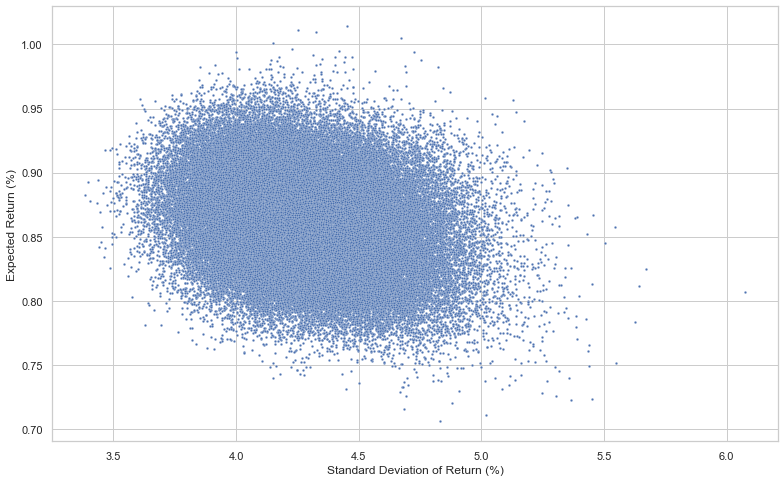

In [8]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(13, 8))
sns.scatterplot(x="Standard Deviation of Return (%)", y="Expected Return (%)",
                data=simulated_portfolio, s = 6)

#### Repeat this entire process by simulating 1/w using the standard uniform distribution: i.e., take the reciprocal of the random draw from the standard uniform distribution as the portfolio weight.

In [9]:
portfolio_mean_return = []
portfolio_std = []

for i in range(0, 100000):
    x = 1/np.random.uniform(size = 10)
    w = x/x.sum()
    portfolio_mean_return_i = (w * R).sum()
    portfolio_std_i = np.sqrt(w.T.dot(C).dot(w))
    portfolio_mean_return.append(portfolio_mean_return_i)
    portfolio_std.append(portfolio_std_i)
    
simulated_portfolio = pd.DataFrame({"Expected Return (%)": portfolio_mean_return,
                                    "Standard Deviation of Return (%)": portfolio_std})

### Q2.2 Plot the new data points to show the minimum-variance frontier on a separate graph.

<AxesSubplot:xlabel='Standard Deviation of Return (%)', ylabel='Expected Return (%)'>

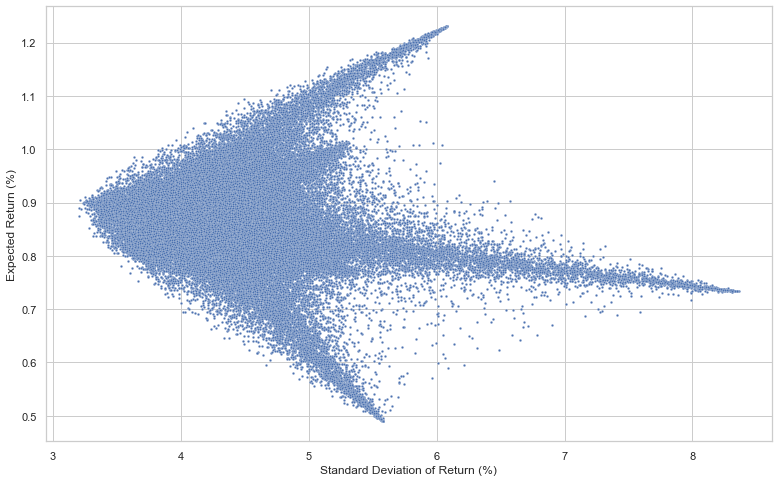

In [16]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(13, 8))
sns.scatterplot(x="Standard Deviation of Return (%)", y="Expected Return (%)",
                data=simulated_portfolio, s = 6)